In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import numpy as np
from PIL import Image
from scipy.ndimage import gaussian_gradient_magnitude
from wordcloud import WordCloud, ImageColorGenerator

## wordcloud a partir de las letras de una cancion 
    autor: metallica
    cancion: king nothing

In [2]:
url = "https://www.azlyrics.com/lyrics/metallica/kingnothing.html"

In [3]:
page = requests.get(url)

In [10]:
soup = BeautifulSoup(page.content,'html.parser')

In [11]:
##  el div que estoy buscando es el unico que no tiene alguna clase
##  div.class('')
lyrics = soup.find_all('div',class_='')
texto = []

for line in lyrics:
    texto.append(line.text.replace("\r","").replace('\n',''))
texto = "".join(texto)
texto

'Wish I may, wish I mightHave this I wish tonightAre you satisfied?Dig for gold, dig for fameYou dig to make your nameAre you pacified?All the wants you wasteAll the things you’ve chasedThen it all crashes downAnd you break your crownAnd you point your fingerBut there’s no one aroundJust want one thingJust to play the kingBut the castle’s crumbledAnd you’re left with just a nameWhere’s your crown,King Nothing?Where’s your crown?Hot and cold, bought and soldA heart as hard as goldAre you satisfied?Wish I might, wish I mayYou wish your life awayAre you pacified?All the wants you wasteAll the things you’ve chasedThen it all crashes downAnd you break your crownAnd you point your fingerBut there’s no one aroundJust want one thingJust to play the kingBut the castle’s crumbledAnd you’re left with just a nameWhere’s your crown, King Nothing?Where’s your crown?I wish I may, I wish I mightHave this wish I wish tonightI want that star, I want it nowI want it all and I don’t care howCareful what y

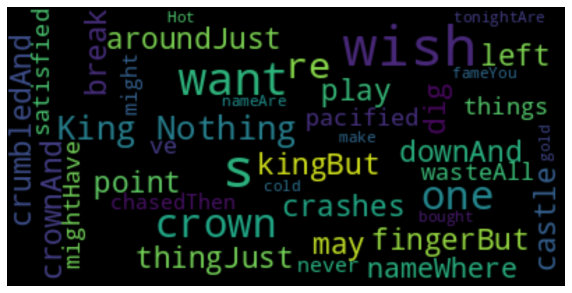

In [13]:
# mostrando el wordcloud de las lyrics
wc = WordCloud(max_font_size=40,max_words=40,background_color='black').generate(texto)
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='gaussian')

plt.axis('off')
plt.show()

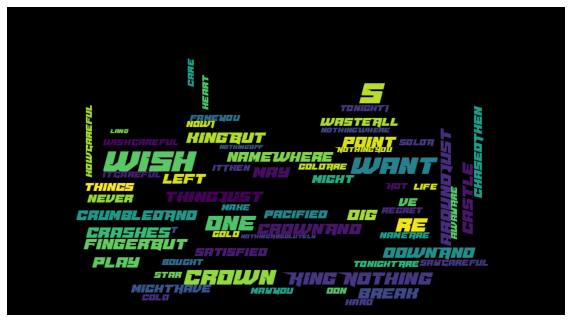

In [26]:
from wordcloud import STOPWORDS
crown_color = np.array(Image.open('./crown.png'))
crown_color = crown_color[::3, ::3]
crown_mask = crown_color.copy()
crown_mask[crown_mask.sum(axis=2) == 0] = 255
edges = np.mean([gaussian_gradient_magnitude(crown_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
crown_mask[edges > .08] = 255
wc = WordCloud(font_path='Masked Hero.ttf',max_words=2000,stopwords=STOPWORDS, mask=crown_mask, max_font_size=40)
wc.generate(texto)
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wc)

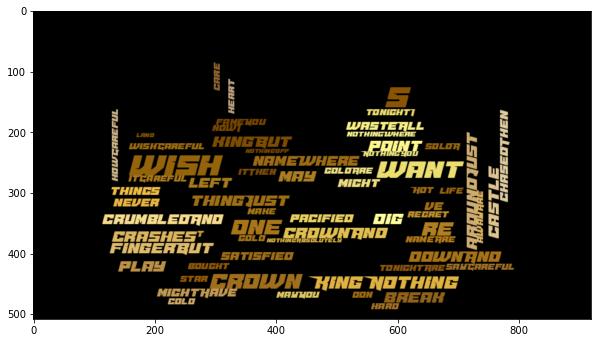

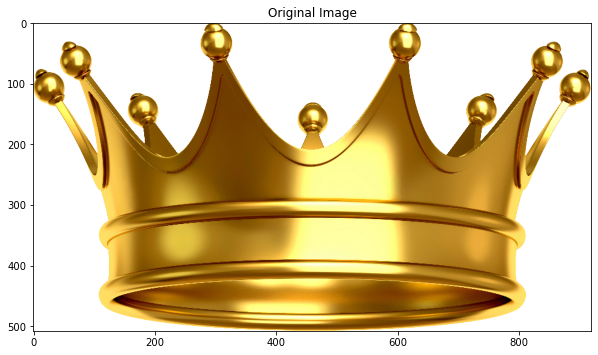

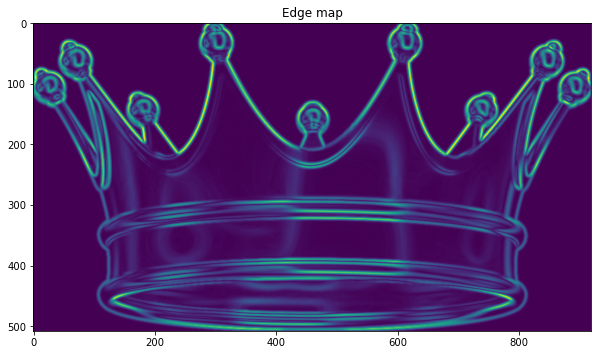

In [27]:
# create coloring from image
image_colors = ImageColorGenerator(crown_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
wc.to_file("crown_new.png")

plt.figure(figsize=(10, 10))
plt.title("Original Image")
plt.imshow(crown_color)

plt.figure(figsize=(10, 10))
plt.title("Edge map")
plt.imshow(edges)
plt.show()